# Th·ªëng k√™ m√°y t√≠nh v√† ·ª©ng d·ª•ng (Computational Statistics and Applications)

## Th√¥ng tin sinh vi√™n :
- **H·ªç v√† t√™n :** Tr√¨nh Cao An  
- **MSSV:** 22127004  

# C√°c th∆∞ vi·ªán c·∫ßn thi·∫øt

In [1]:
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import pymc as pm
import arviz as az
import pytensor.tensor as pt
from scipy.stats import beta
import pandas as pd

# C√¢u 1

## C√¢u 1a
Ta c√≥ h√†m m·∫≠t ƒë·ªô x√°c su·∫•t $f(x, y) ‚àù e^{-\frac{x^2y^2 + x^2 + y^2 -8x-8y}{2}}$

### 1. L·∫•y m·∫´u ƒë·ªôc l·∫≠p.
#### X√°c minh ƒëi·ªÉm c·ª±c ƒë·∫°i c·ªßa $f(x, y)$
ƒê·ªÉ ch·ªçn ph√¢n ph·ªëi ƒë·ªÅ ngh·ªã hi·ªáu qu·∫£, ta c·∫ßn x√°c ƒë·ªãnh h√†m m√† $f(x, y)$ ƒë·∫°t gi√° tr·ªã l·ªõn nh·∫•t, v√¨ ƒë√¢y l√† v√πng t·∫≠p trung c·ªßa ph√¢n ph·ªëi m·ª•c ti√™u. Ta t·ªëi ∆∞u h√≥a h√†m:
$$h(x, y) = -\frac{x^2y^2+x^2+y^2 - 8x - 8y}{2}$$
V√¨ $f(x, y) ‚àù e^{h(x, y)}$ n√™n ƒëi·ªÉm c·ª±c ƒë·∫°i c·ªßa $f(x, y)$ c≈©ng l√† ƒëi·ªÉm c·ª±c ƒë·∫°i c·ªßa $h(x, y)$.  
T√¨m ƒëi·ªÉm c·ª±c ƒë·∫°i:
[K·∫øt qu·∫£ ƒëi·ªÉm c·ª±c ƒë·∫°i ƒë∆∞·ª£c t√≠nh tr√™n Wolframalpha](https://www.wolframalpha.com/input?i2d=true&i=max%5C%2840%29Power%5Be%2C%5C%2840%29-Divide%5BPower%5Bx%2C2%5DPower%5By%2C2%5D%2BPower%5Bx%2C2%5D%2BPower%5By%2C2%5D-8x-8y%2C2%5D%5C%2841%29%5D%5C%2841%29)  
Ta c√≥:
$$\begin{cases}
(x_1, y_1) = (2 - \sqrt{3}, 2 + \sqrt{3}) \\
(x_2, y_2) = \left(2 + \sqrt{3}, \frac{1}{2 + \sqrt{3}}\right)
\end{cases}$$
#### Ch·ªçn ph√¢n ph·ªëi ƒë·ªÅ ngh·ªã
Ta s·∫Ω ch·ªçn m·ªôt ph√¢n ph·ªëi Gaussian ƒë∆°n v·ªõi m·ªôt t√¢m duy nh·∫•t c√≥ th·ªÉ kh√¥ng bao ph·ªß t·ªët c·∫£ hai v√πng. Tuy nhi√™n, ƒë·ªÉ gi·ªØ s·ª± ƒë∆°n gi·∫£n, ch√∫ng ta c√≥ th·ªÉ:
- T√≠nh trung b√¨nh $x, y$ c·ªßa 2 ƒëi·ªÉm c·ª±c ƒë·∫°i ƒë·ªÉ l√†m k·ª≥ v·ªçng:
$$\mu_x = 2, \mu_y ‚âà 2$$
- Ch·ªçn ph∆∞∆°ng sai $œÉ_x = œÉ_y = 1.5$ ƒë·ªß ƒë·ªÉ bao ph·ªß c·∫£ 2 ƒëi·ªÉm c·ª±c ƒë·∫°i.

#### T√≠nh h·∫±ng s·ªë $c$
ƒê·ªÉ √°p d·ª•ng Rejection Sampling, ta c·∫ßn $f(x, y) \leq c ¬∑ g(x, y)$ cho m·ªçi $(x, y)$. Do ƒë√≥ $c$ ph·∫£i l∆°n h∆°n gi√° tr·ªã l·ªõn nh·∫•t c·ªßa $\frac{f}{g}$

H·∫±ng s·ªë c: 651506.7170750515
T·ª∑ l·ªá ch·∫•p nh·∫≠n: 0.0313
T·ªïng s·ªë l·∫ßn th·ª≠: 319790
Trung b√¨nh X: 1.8336
Trung b√¨nh Y: 1.8848
Ma tr·∫≠n hi·ªáp ph∆∞∆°ng sai:
 [[ 2.7560169  -2.32981251]
 [-2.32981251  2.80929154]]


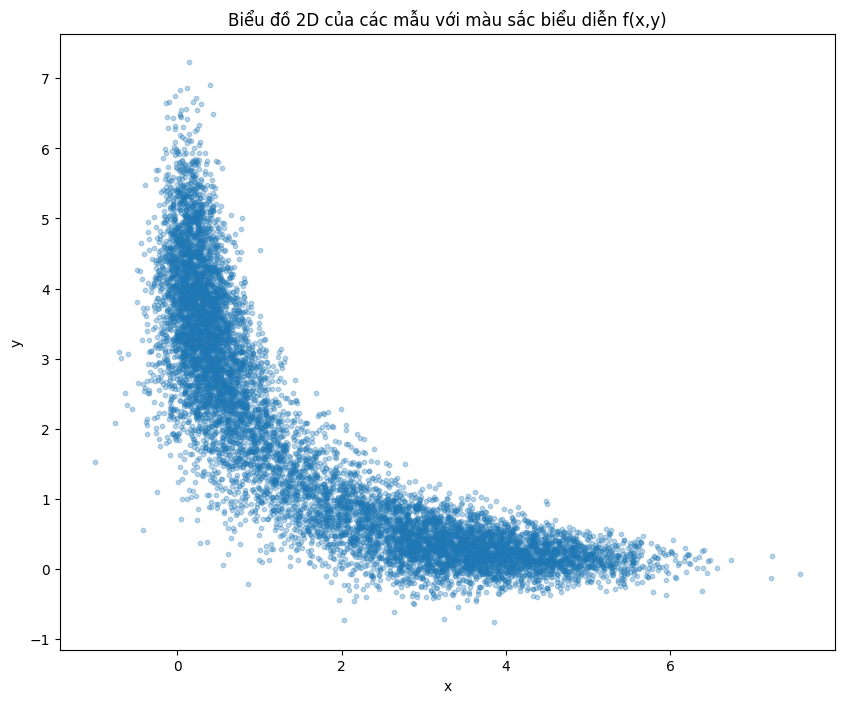

In [2]:
# H√†m Rejection Sampling
def ESR_2D(N, f, gs, g, c):
    T = 0       # T·ªïng s·ªë l·∫ßn th·ª≠
    X = []      # Danh s√°ch l∆∞u m·∫´u
    i = 0       # S·ªë m·∫´u ƒë√£ ch·∫•p nh·∫≠n
    while i < N:
        T += 1
        x, y = gs()
        U = np.random.uniform()  # Sinh U ~ U(0,1)
        if c * g(x, y) * U <= f(x, y):
            X.append([x, y])
            i += 1
    return np.array(X), T

# H√†m m·∫≠t ƒë·ªô m·ª•c ti√™u
def f_target(x, y):
    return np.exp(-(x**2 * y**2 + x**2 + y**2 - 8*x - 8*y) / 2)

# H√†m m·∫≠t ƒë·ªô ƒë·ªÅ ngh·ªã: Gaussian ƒë∆°n
def g_proposal(x, y, mu_x=2.0, mu_y=2.0, sigma_x=1.5, sigma_y=1.5):
    gx = (1/(np.sqrt(2*np.pi)*sigma_x)) * np.exp(-((x - mu_x)**2)/(2*sigma_x**2))
    gy = (1/(np.sqrt(2*np.pi)*sigma_y)) * np.exp(-((y - mu_y)**2)/(2*sigma_y**2))
    return gx * gy

# Sinh m·∫´u t·ª´ ƒë·ªÅ ngh·ªã
def gs_proposal(mu_x=2.0, mu_y=2.0, sigma_x=1.5, sigma_y=1.5):
    x = np.random.normal(loc=mu_x, scale=sigma_x)
    y = np.random.normal(loc=mu_y, scale=sigma_y)
    return x, y

# T√≠nh h·∫±ng s·ªë c
n_points = 1000000
x_samples = np.random.normal(loc=2.0, scale=1.5, size=n_points)
y_samples = np.random.normal(loc=2.0, scale=1.5, size=n_points)
f_values = f_target(x_samples, y_samples)
g_values = g_proposal(x_samples, y_samples)
c = 1.1 * np.max(f_values / g_values)  # Nh√¢n 1.1 ƒë·ªÉ ƒë·∫£m b·∫£o an to√†n
print(f"H·∫±ng s·ªë c: {c}")
# Thi·∫øt l·∫≠p seed
np.random.seed(2022)

# S·ªë m·∫´u c·∫ßn l·∫•y
N = 10000

# L·∫•y m·∫´u
samples, total_attempts = ESR_2D(N, f_target, gs_proposal, g_proposal, c)

# K·∫øt qu·∫£
print(f"T·ª∑ l·ªá ch·∫•p nh·∫≠n: {N / total_attempts:.4f}")
print(f"T·ªïng s·ªë l·∫ßn th·ª≠: {total_attempts}")
print(f"Trung b√¨nh X: {np.mean(samples[:, 0]):.4f}")
print(f"Trung b√¨nh Y: {np.mean(samples[:, 1]):.4f}")
print("Ma tr·∫≠n hi·ªáp ph∆∞∆°ng sai:\n", np.cov(samples.T))


z_values = np.array([f_target(x, y) for x, y in samples])

# T·∫°o bi·ªÉu ƒë·ªì 2D
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(samples[:, 0], samples[:, 1], alpha=0.3, s=10)
ax.set_title("Bi·ªÉu ƒë·ªì 2D c·ªßa c√°c m·∫´u v·ªõi m√†u s·∫Øc bi·ªÉu di·ªÖn f(x,y)")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

### 2. Metropolis-Hastings (ho·∫∑c Metropolis)
H√†m m·∫≠t ƒë·ªô m·ª•c ti√™u c·ªßa ch√∫ng ta l√†:
$$f(x, y) = e^{-\frac{x^2y^2+x^2+y^2 - 8x - 8y}{2}}$$
V√¨ ƒë√¢y l√† d·∫°ng kh√¥ng ph·∫£i chu·∫©n h√≥a, Metropolis-Hastings l√† l·ª±a ch·ªçn ph√π h·ª£p.  
Ph√¢n ph·ªëi ƒë·ªÅ ngh·ªã s·ª≠ d·ª•ng : S·ª≠ d·ª•ng ph√¢n ph·ªëi Gaussian ƒë·ªëi x·ª©ng $q(x',y'|x, y) = ùìù(x, œÉ^2) \times ùìù(y, œÉ^2)$, v·ªõi $œÉ$ l√† ƒë·ªô l·ªách chu·∫©n c·ªßa b∆∞·ªõc nh·∫£y.  
T·ª∑ l·ªá ch·∫•p nh·∫≠n : V√¨ $q$ ƒë·ªëi x·ª©ng, t·ª∑ l·ªá ch·∫•p nh·∫≠n ƒë∆°n gi·∫£n h√≥a th√†nh $Œ± = \min\left(1, \frac{f(x', y')}{f(x, y)}\right)$.  


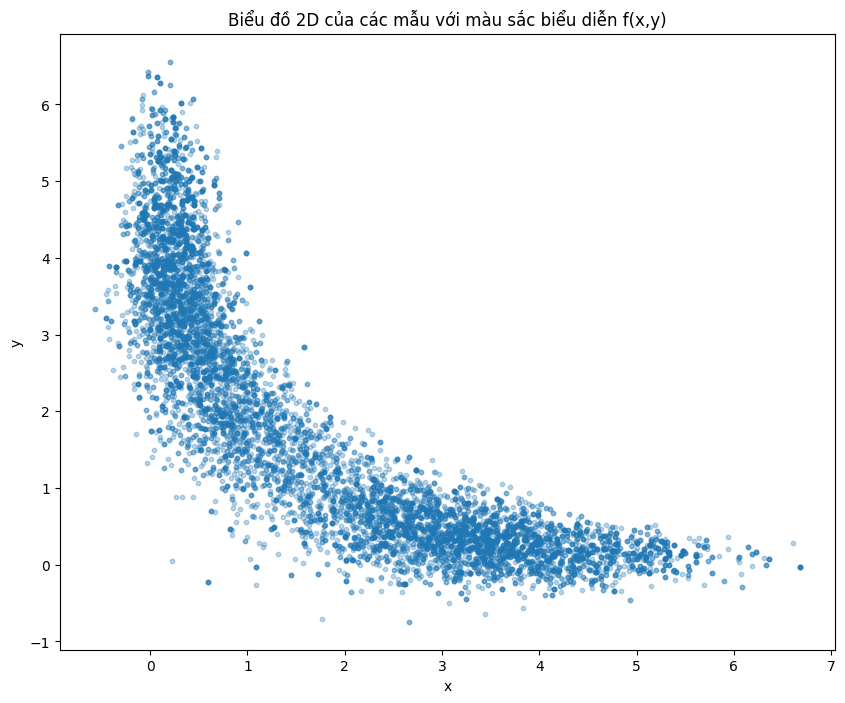

In [3]:
# Thu·∫≠t to√°n Metropolis-Hastings
def metropolis_hastings(N, sigma, x0, y0):
    samples = []
    x, y = x0, y0
    for _ in range(N):
        # Sinh ƒëi·ªÉm ƒë·ªÅ ngh·ªã t·ª´ Gaussian
        x_prime = x + np.random.normal(0, sigma)
        y_prime = y + np.random.normal(0, sigma)

        # T√≠nh t·ª∑ l·ªá ch·∫•p nh·∫≠n
        alpha = min(1, f_target(x_prime, y_prime) / f_target(x, y))

        # Ch·∫•p nh·∫≠n ho·∫∑c t·ª´ ch·ªëi
        if np.random.uniform(0, 1) < alpha:
            x, y = x_prime, y_prime

        samples.append([x, y])
    return np.array(samples)

# Tham s·ªë
N = 10000  # S·ªë l∆∞·ª£ng m·∫´u
sigma = 0.5  # B∆∞·ªõc nh·∫£y
x0, y0 = 2, 2  # ƒêi·ªÉm kh·ªüi ƒë·∫ßu

# Ch·∫°y thu·∫≠t to√°n
samples = metropolis_hastings(N, sigma, x0, y0)

# T·∫°o bi·ªÉu ƒë·ªì 2D
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(samples[:, 0], samples[:, 1], alpha=0.3, s=10)
ax.set_title("Bi·ªÉu ƒë·ªì 2D c·ªßa c√°c m·∫´u v·ªõi m√†u s·∫Øc bi·ªÉu di·ªÖn f(x,y)")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()


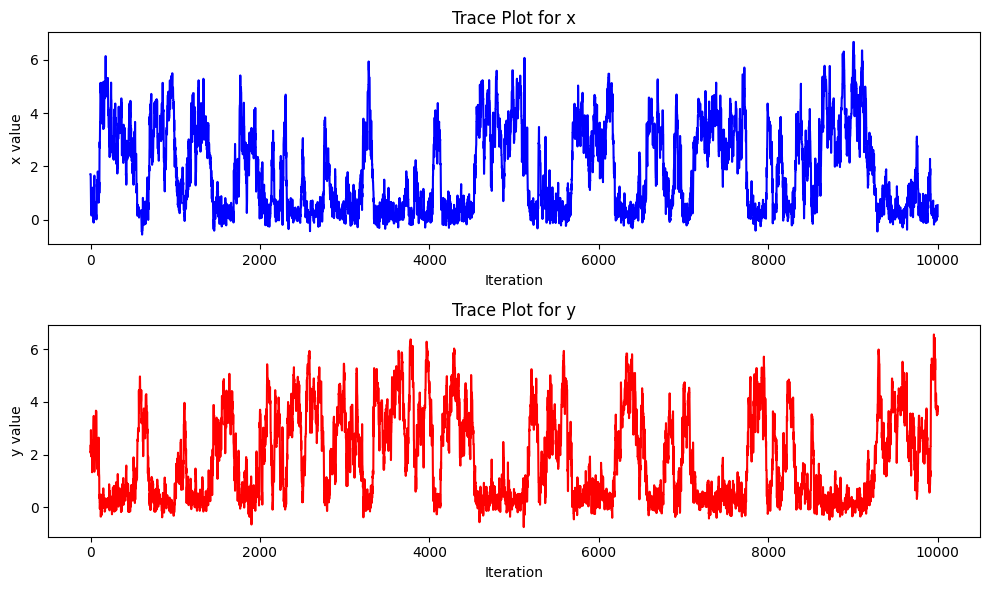

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
# Trace plot cho x
axs[0].plot(samples[:, 0], color='blue')
axs[0].set_title('Trace Plot for x')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('x value')

# Trace plot cho y
axs[1].plot(samples[:, 1], color='red')
axs[1].set_title('Trace Plot for y')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('y value')

plt.tight_layout()
plt.show()


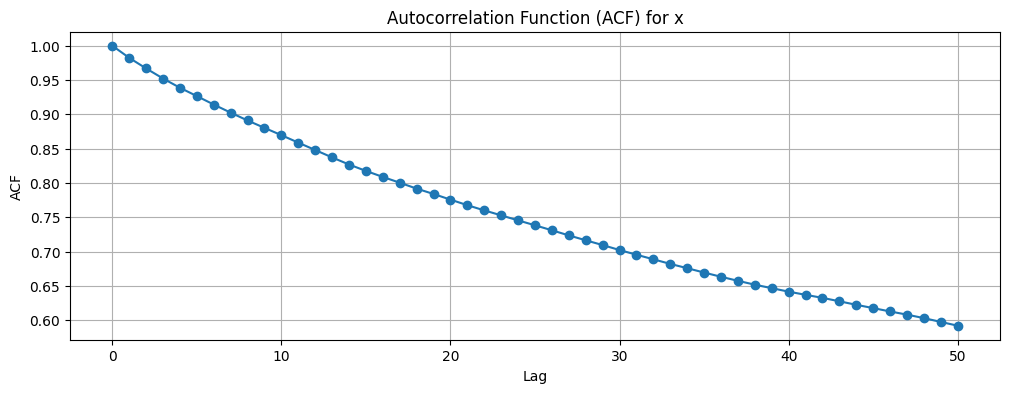

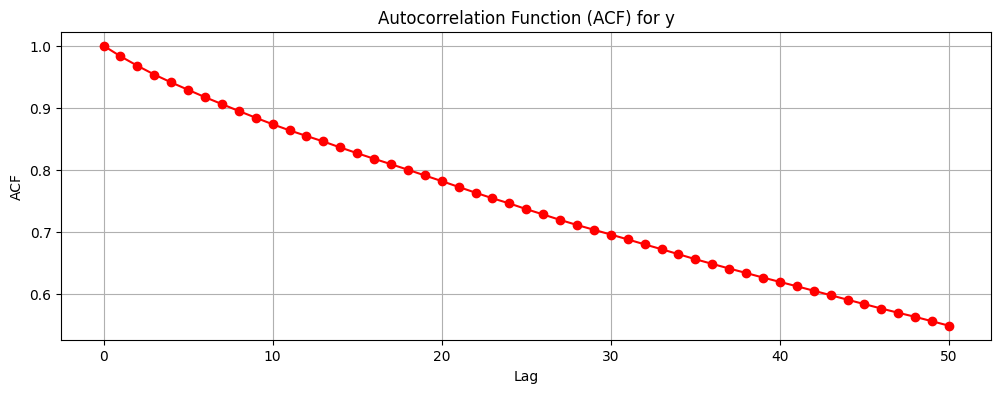

In [5]:
acf_x = sm.tsa.acf(samples[:, 0], nlags=50, fft = True)
acf_y = sm.tsa.acf(samples[:, 1], nlags=50, fft = True)
# In ra gi√° tr·ªã ACF
# print("ACF cho x:", acf_x)
# print("ACF cho y:", acf_y)
# V·∫Ω bi·ªÉu ƒë·ªì ACF cho x
plt.figure(figsize=(12, 4))
plt.plot(acf_x, marker='o')
plt.title("Autocorrelation Function (ACF) for x")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

# V·∫Ω bi·ªÉu ƒë·ªì ACF cho y
plt.figure(figsize=(12, 4))
plt.plot(acf_y, marker='o', color='red')
plt.title("Autocorrelation Function (ACF) for y")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

### 3. L·∫•y m·∫´u Gibbs
ƒê·ªÉ √°p d·ª•ng Gibbs Sampling, ch√∫ng ta c·∫ßn t√≠nh c√°c ph√¢n ph·ªëi c√≥ ƒëi·ªÅu ki·ªán $p(x|y)$ v√† $p(y|x)$ t·ª´ $f(x, y)$.  
1. T√≠nh $p(x|y)$  
Khi coi $y$ l√† h·∫Øng s·ªë ta c√≥:
$$p(x|y) ‚àù e^{-\frac{x^2y^2 + x^2 - 8x}{2}} = e^{-\frac{y^2 + 1}{2}
\left(x - \frac{4}{y^2 + 1}\right) + c}$$
ƒê√¢y l√† ph√¢n ph·ªëi Gaussian v·ªõi:
  - K·ª≥ v·ªçng : $\mu_x = \frac{4}{y^2 + 1}$
  - Ph∆∞∆°ng sai : $œÉ^2_x = \frac{4}{y^2 + 1}$.  
V·∫≠y:
$$x|y ‚àº ùìù\left(\frac{4}{y^2 + 1}, \frac{4}{y^2 + 1}\right)$$.
2. T√≠nh $p(y|x)$  
Khi coi $x$ l√† h·∫±ng s·ªë ta c√≥:
$$p(y|x) ‚àù e^{-\frac{x^2y^2 + y^2 - 8y}{2}}$$
T∆∞∆°ng t·ª± nh∆∞ tr√™n ta c√≥:
$$y|x ‚àº ùìù\left(\frac{4}{x^2 + 1}, \frac{4}{x^2 + 1}\right)$$.


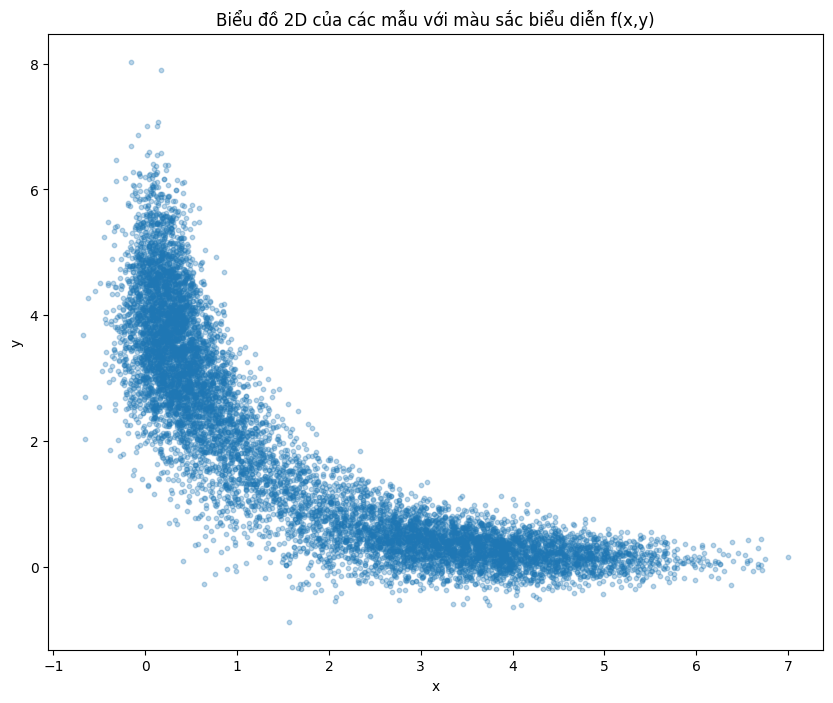

In [6]:
def gibbs_sampling(N, x0, y0):
    samples = []
    x, y = x0, y0
    for _ in range(N):
        # L·∫•y m·∫´u x t·ª´ p(x | y)
        mu_x = 4 / (y**2 + 1)
        sigma_x = np.sqrt(1 / (y**2 + 1))
        x = np.random.normal(mu_x, sigma_x)

        # L·∫•y m·∫´u y t·ª´ p(y | x)
        mu_y = 4 / (x**2 + 1)
        sigma_y = np.sqrt(1 / (x**2 + 1))
        y = np.random.normal(mu_y, sigma_y)

        samples.append([x, y])
    return np.array(samples)

# Tham s·ªë
N = 10000  # S·ªë l∆∞·ª£ng m·∫´u
x0, y0 = 2, 2  # Gi√° tr·ªã kh·ªüi ƒë·∫ßu

# Ch·∫°y Gibbs Sampling
samples = gibbs_sampling(N, x0, y0)

# T·∫°o bi·ªÉu ƒë·ªì 2D
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(samples[:, 0], samples[:, 1], alpha=0.3, s=10)
ax.set_title("Bi·ªÉu ƒë·ªì 2D c·ªßa c√°c m·∫´u v·ªõi m√†u s·∫Øc bi·ªÉu di·ªÖn f(x,y)")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()



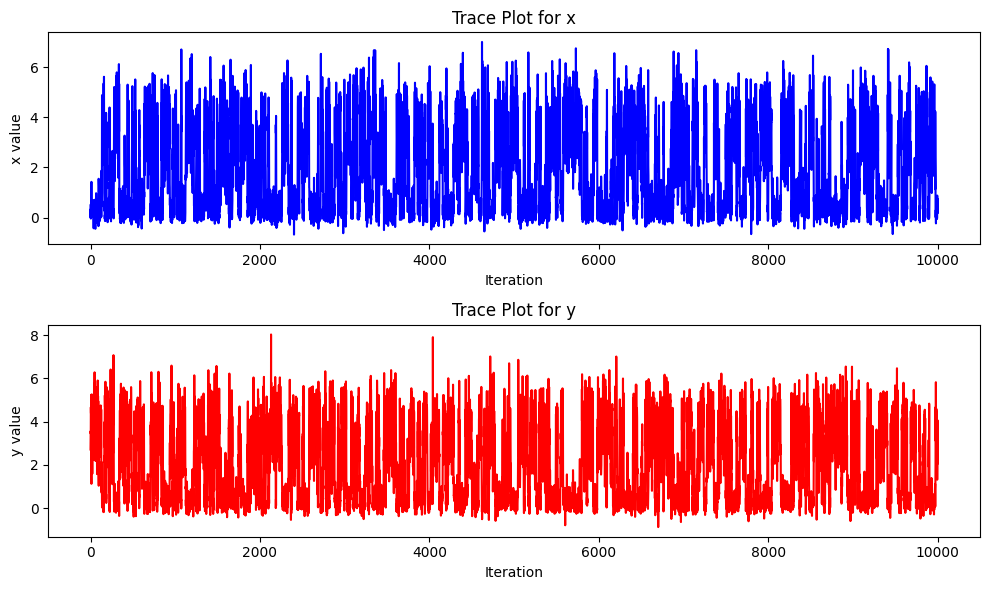

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Trace plot cho x
axs[0].plot(samples[:, 0], color='blue')
axs[0].set_title('Trace Plot for x')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('x value')

# Trace plot cho y
axs[1].plot(samples[:, 1], color='red')
axs[1].set_title('Trace Plot for y')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('y value')

plt.tight_layout()
plt.show()

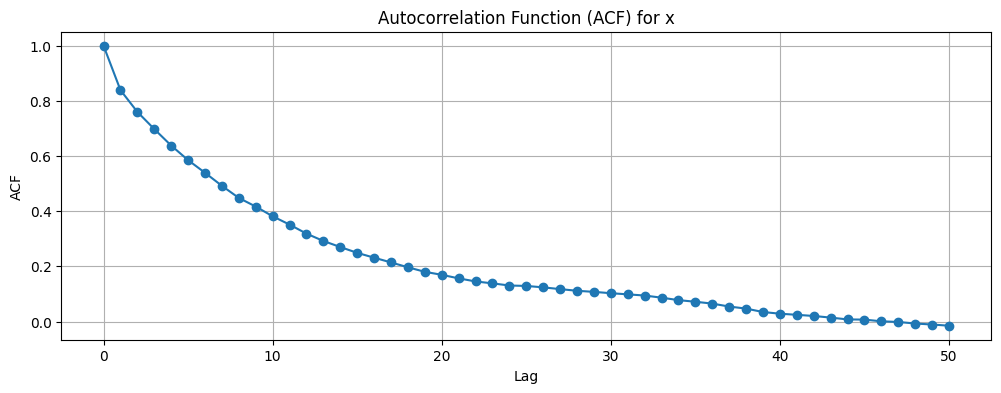

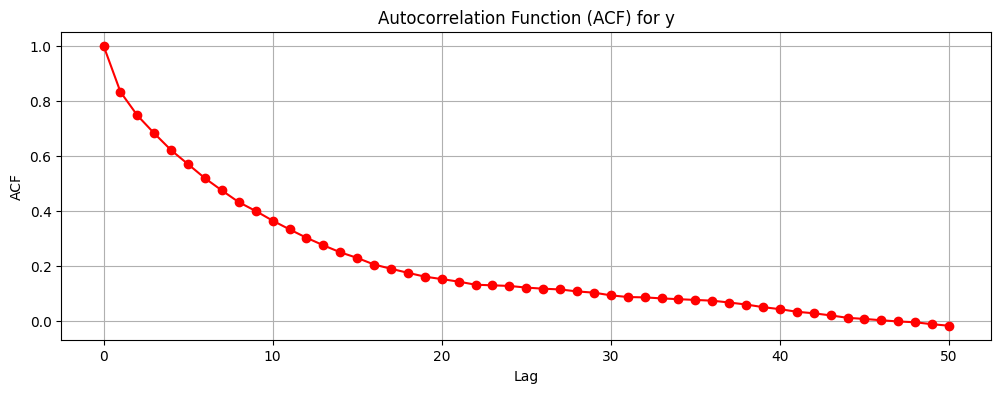

In [8]:
acf_x = sm.tsa.acf(samples[:, 0], nlags=50, fft = True)
acf_y = sm.tsa.acf(samples[:, 1], nlags=50, fft = True)
# In ra gi√° tr·ªã ACF
# print("ACF cho x:", acf_x)
# print("ACF cho y:", acf_y)
# V·∫Ω bi·ªÉu ƒë·ªì ACF cho x
plt.figure(figsize=(12, 4))
plt.plot(acf_x, marker='o')
plt.title("Autocorrelation Function (ACF) for x")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

# V·∫Ω bi·ªÉu ƒë·ªì ACF cho y
plt.figure(figsize=(12, 4))
plt.plot(acf_y, marker='o', color='red')
plt.title("Autocorrelation Function (ACF) for y")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

## 1b. So s√°nh c√°c ph∆∞∆°ng ph√°p ·ªü c√¢u a


### Ph∆∞∆°ng ph√°p ESR v·ªõi Acceptance-Rejection (L·∫•y m·∫´u ƒë·ªôc l·∫≠p)
∆Øu ƒëi·ªÉm:
- M·∫´u ƒë·ªôc l·∫≠p: M·ªói m·∫´u ƒë∆∞·ª£c sinh ra ho√†n to√†n ƒë·ªôc l·∫≠p v·ªõi nhau, kh√¥ng c√≥ ‚Äúd√≠nh‚Äù th√¥ng tin t·ª´ m·∫´u tr∆∞·ªõc ƒë√≥.
- D·ªÖ hi·ªÉu v√† c√†i ƒë·∫∑t: √ù t∆∞·ªüng r·∫•t ƒë∆°n gi·∫£n v√† d·ªÖ h√¨nh dung.  

Nh∆∞·ª£c ƒëi·ªÉm:
- Hi·ªáu qu·∫£ th·∫•p n·∫øu c qu√° cao: N·∫øu h·∫±ng s·ªë c l·ªõn, c√≥ th·ªÉ ph·∫£i th·ª≠ r·∫•t nhi·ªÅu l·∫ßn (T ƒë∆∞·ª£c tƒÉng r·∫•t nhi·ªÅu) m·ªõi c√≥ ƒë·ªß m·∫´u ch·∫•p nh·∫≠n, d·∫´n ƒë·∫øn t·ªën th·ªùi gian t√≠nh to√°n.
- Ph·ª• thu·ªôc v√†o vi·ªác ch·ªçn ƒë√∫ng ph√¢n ph·ªëi ƒë·ªÅ ngh·ªã: N·∫øu ph√¢n ph·ªëi ƒë·ªÅ ngh·ªã kh√¥ng ‚Äúƒë·ªß t·ªët‚Äù ƒë·ªÉ g·∫ßn v·ªõi ph√¢n ph·ªëi m·ª•c ti√™u, t·ª∑ l·ªá m·∫´u b·ªã lo·∫°i s·∫Ω cao.

### Thu·∫≠t to√°n Metropolis-Hastings
∆Øu ƒëi·ªÉm:
- Linh ho·∫°t: Kh√¥ng c·∫ßn ph·∫£i t√≠nh to√°n h·∫±ng s·ªë c.
- C√≥ th·ªÉ √°p d·ª•ng cho nhi·ªÅu tr∆∞·ªùng h·ª£p: D√π ph√¢n ph·ªëi m·ª•c ti√™u c√≥ h√¨nh d·∫°ng ph·ª©c t·∫°p, M-H v·∫´n c√≥ th·ªÉ ho·∫°t ƒë·ªông.  

Nh∆∞·ª£c ƒëi·ªÉm:
- T·ª± t∆∞∆°ng quan gi·ªØa c√°c m·∫´u: C√°c m·∫´u li√™n ti·∫øp c√≥ th·ªÉ ‚Äúd√≠nh‚Äù v√†o nhau, c·∫ßn th√™m b∆∞·ªõc ‚Äúburn-in‚Äù (lo·∫°i b·ªè m·ªôt s·ªë m·∫´u ƒë·∫ßu) ƒë·ªÉ ƒë·∫£m b·∫£o chu·ªói ƒë√£ h·ªôi t·ª•.
- C·∫ßn tinh ch·ªânh tham s·ªë (nh∆∞ sigma): N·∫øu b∆∞·ªõc nh·∫£y qu√° l·ªõn ho·∫∑c qu√° nh·ªè, chu·ªói c√≥ th·ªÉ kh√¥ng ‚Äúdi chuy·ªÉn‚Äù hi·ªáu qu·∫£ qua kh√¥ng gian m·∫´u.

### Thu·∫≠t to√°n Gibbs Sampling
∆Øu ƒëi·ªÉm:
- D·ªÖ d√†ng l·∫•y m·∫´u t·ª´ c√°c ph√¢n ph·ªëi ƒëi·ªÅu ki·ªán: N·∫øu em c√≥ c√°c c√¥ng th·ª©c r√µ r√†ng cho ph√¢n ph·ªëi ƒëi·ªÅu ki·ªán, vi·ªác c·∫≠p nh·∫≠t s·∫Ω r·∫•t nhanh v√† hi·ªáu qu·∫£.
- H·ªôi t·ª• nhanh n·∫øu ph√¢n ph·ªëi ƒëi·ªÅu ki·ªán ƒë∆°n gi·∫£n: Khi ƒëi·ªÅu ki·ªán d·ªÖ l·∫•y m·∫´u, chu·ªói c√≥ th·ªÉ ‚Äútr·ªôn‚Äù nhanh v√† cho k·∫øt qu·∫£ ·ªïn ƒë·ªãnh.

Nh∆∞·ª£c ƒëi·ªÉm:
- Kh√¥ng ph·∫£i l√∫c n√†o c≈©ng √°p d·ª•ng ƒë∆∞·ª£c: N·∫øu kh√¥ng th·ªÉ t√≠nh ƒë∆∞·ª£c ph√¢n ph·ªëi ƒëi·ªÅu ki·ªán c·ªßa t·ª´ng bi·∫øn, Gibbs Sampling s·∫Ω kh√¥ng th·ª±c hi·ªán ƒë∆∞·ª£c.
- C√≥ th·ªÉ b·ªã ‚Äúk·∫πt‚Äù n·∫øu c√°c bi·∫øn ph·ª• thu·ªôc m·∫°nh: Khi s·ª± ph·ª• thu·ªôc gi·ªØa c√°c bi·∫øn qu√° cao, m·ªói b∆∞·ªõc c·∫≠p nh·∫≠t ch·ªâ thay ƒë·ªïi r·∫•t √≠t n√™n chu·ªói chuy·ªÉn ƒë·ªông ch·∫≠m.

### K·∫øt lu·∫≠n
V·ªÅ th·ªùi gian ƒëo 3 thu·∫≠t to√°n ta th·∫•y Gibbs Sampling v√† MH ƒëang l√†m t·ªët h∆°n so v·ªõi ph∆∞∆°ng ph√°p l·∫•y m·∫´u ƒë·ªôc l·∫≠p.
So s√°nh 2 thu·∫≠t to√°n Gibbs Sampling v√† MH ta c≈©ng th·∫•y r·∫±ng Gibb ƒëang cho ra m·∫´u ƒë·ªôc l·∫≠p h∆°n (d·ª±a v√†o bi·ªÉu ƒë·ªì ACF v√† trace).
V√¨ v·∫≠y ·ªü c√¢u a thu·∫≠t to√°n ho·∫°t ƒë·ªông t·ªët nh·∫•t l√† Gibbs Sampling.

## 1c ∆Ø·ªõc l∆∞·ª£ng x√°c su·∫•t $P(X \leq Y) $ v√† k·ª≥ v·ªçng $E(XY)$ (c√≥ ƒë√°nh gi√° sai s·ªë).

In [9]:
# Thi·∫øt l·∫≠p tham s·ªë
N = 100000      # S·ªë l∆∞·ª£ng m·∫´u
x0, y0 = 2, 2  # Gi√° tr·ªã kh·ªüi ƒë·∫ßu

# Ch·∫°y Gibbs Sampling
samples = gibbs_sampling(N, x0, y0)


# ∆Ø·ªõc l∆∞·ª£ng P(X >= Y)
indicator = samples[:, 0] >= samples[:, 1]
P_est = np.mean(indicator)
# T√≠nh sai s·ªë chu·∫©n (standard error) cho t·ª∑ l·ªá nh·ªã ph√¢n:
se_P = np.sqrt(P_est * (1 - P_est) / len(indicator))

# ∆Ø·ªõc l∆∞·ª£ng E(XY)
XY = samples[:, 0] * samples[:, 1]
E_est = np.mean(XY)
se_E = np.std(XY, ddof=1) / np.sqrt(len(XY))

# T√≠nh kho·∫£ng tin c·∫≠y 95% cho P(X >= Y)
CI_lower_P = P_est - 1.96 * se_P
CI_upper_P = P_est + 1.96 * se_P

# T√≠nh kho·∫£ng tin c·∫≠y 95% cho E(XY)
CI_lower_E = E_est - 1.96 * se_E
CI_upper_E = E_est + 1.96 * se_E

print("95% Confidence Interval for P(X >= Y): [{:.4f}, {:.4f}]".format(CI_lower_P, CI_upper_P))
print("95% Confidence Interval for E(XY): [{:.4f}, {:.4f}]".format(CI_lower_E, CI_upper_E))


95% Confidence Interval for P(X >= Y): [0.4979, 0.5040]
95% Confidence Interval for E(XY): [1.1267, 1.1386]


# C√¢u 2

## 2a. Kh√¥ng bi·∫øt th√¥ng tin g√¨ c·∫£

L·ª±a ch·ªçn ti√™n nghi·ªám:
- Ch·ªçn $p \sim Beta(1, 1)$ (do kh√¥ng c√≥ th√¥ng tin g√¨ c·∫£ n√™n $p \in [0, 1]$)
- D·ªØ li·ªáu $n = 10, z = 8$
- Likelihood : $y \sim Binomial(n = 10, p)$ v·ªõi $y = 8$
- Posterior v·ªõi ti√™n nghi·ªám $Beta(1, 1)$ v√† d·ªØ li·ªáu s·∫Ω l√†:
$$p | y \sim Beta(9, 3)$$

Output()

   mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.75  0.122     0.518       0.96      0.003    0.002    1549.0    1535.0   

   r_hat  
p    1.0  


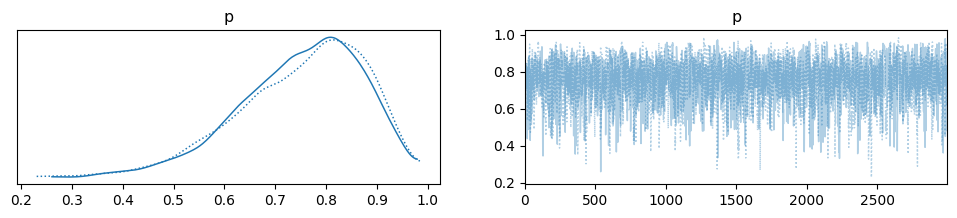

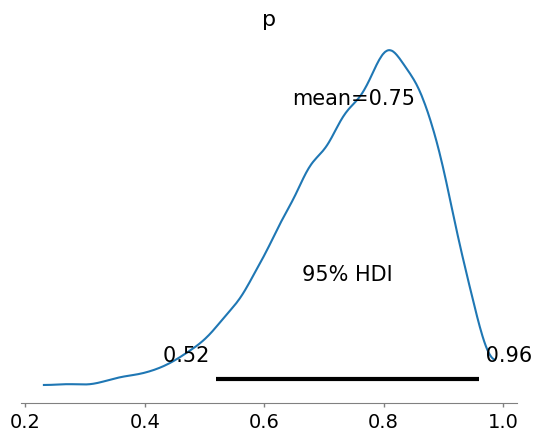

In [10]:
# X√¢y d·ª±ng m√¥ h√¨nh Bayesian
with pm.Model() as coin_model:
    # Prior: p ~ Beta(1,1) (Uniform tr√™n [0,1])
    p = pm.Beta("p", alpha=1, beta=1)

    # Likelihood: S·ª≠ d·ª•ng ph√¢n ph·ªëi Binomial
    # Tung ƒë·ªìng xu 10 l·∫ßn, quan s√°t th·∫•y 8 l·∫ßn ra ng·ª≠a.
    y_obs = pm.Binomial("y_obs", n=10, p=p, observed=8)

    # L·∫•y m·∫´u posterior: s·ª≠ d·ª•ng thu·∫≠t to√°n MCMC (NUTS l√† m·∫∑c ƒë·ªãnh)
    trace = pm.sample(draws=3000, tune=1000, chains=2, random_seed=42, target_accept=0.95)

# T√≥m t·∫Øt k·∫øt qu·∫£
summary = az.summary(trace, var_names=["p"], hdi_prob=0.95)
print(summary)

# V·∫Ω trace plot v√† ph√¢n ph·ªëi posterior c·ªßa p
az.plot_trace(trace, var_names=["p"])
plt.show()

az.plot_posterior(trace, var_names=["p"], hdi_prob=0.95)
plt.show()


In [11]:
# T√≠nh x√°c su·∫•t p > 0.6 t·ª´ c√°c m·∫´u
p_samples = trace.posterior["p"].values.flatten()
prob_gt_06 = np.mean(p_samples > 0.6)
print(f"P(p > 0.6) ‚âà {prob_gt_06:.4f}")

P(p > 0.6) ‚âà 0.8785


**K·∫øt lu·∫≠n** : ∆∞·ªõc l∆∞·ª£ng t·ªët nh·∫•t cho $p$ l√† kho·∫£ng 0.75 v√† kh·∫£ nƒÉng $p > 0.6$ l√† r·∫•t cao d·ª±a tr√™n m√¥ h√¨nh Bayes n√†y.

## 2b. ƒê·ªìng xu c√≥ kh·∫£ nƒÉng c√¢n ƒë·ªëi cao ($p$ quanh 0.5)

L·ª±a ch·ªçn ti√™n nghi·ªám:
- Ch·ªçn $p \sim Beta(5, 5)$ (do ƒë·ªìng xu c√≥ kh·∫£ nƒÉng c√¢n ƒë·ªëi cao v√† $p$ quanh 0.5)
- D·ªØ li·ªáu $n = 10, z = 8$
- Likelihood : $y \sim Binomial(n = 10, p)$ v·ªõi $y = 8$
- Posterior v·ªõi ti√™n nghi·ªám $Beta(1, 1)$ v√† d·ªØ li·ªáu s·∫Ω l√†:
$$p | y \sim Beta(13, 7)$$

Output()

    mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.649  0.104     0.442      0.843      0.002    0.002    2268.0    2280.0   

   r_hat  
p    1.0  


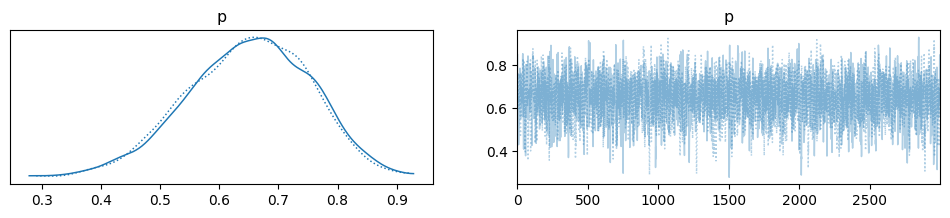

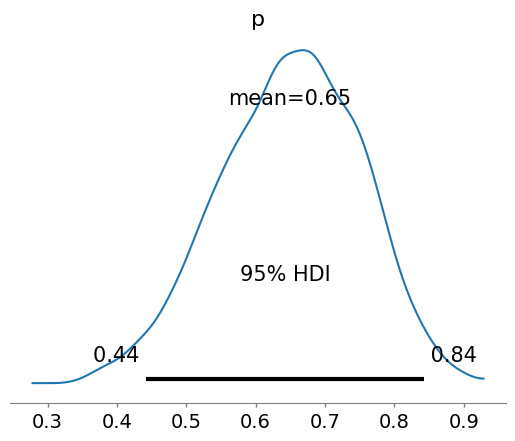

In [12]:
# X√¢y d·ª±ng m√¥ h√¨nh v·ªõi ti√™n nghi·ªám Beta(5,5)
with pm.Model() as coin_model_b:
    # Prior: p ~ Beta(5,5) - t·∫≠p trung quanh 0.5
    p = pm.Beta("p", alpha=5, beta=5)

    # Likelihood: Quan s√°t 8 l·∫ßn ra ng·ª≠a trong 10 l·∫ßn tung
    y_obs = pm.Binomial("y_obs", n=10, p=p, observed=8)

    # L·∫•y m·∫´u posterior: d√πng MCMC (NUTS ƒë∆∞·ª£c ch·ªçn m·∫∑c ƒë·ªãnh)
    trace_b = pm.sample(draws=3000, tune=1000, chains=2, random_seed=42, target_accept=0.95)

# T√≥m t·∫Øt k·∫øt qu·∫£
summary_b = az.summary(trace_b, var_names=["p"], hdi_prob=0.95)
print(summary_b)

# V·∫Ω trace plot v√† posterior plot cho p
az.plot_trace(trace_b, var_names=["p"])
plt.show()

az.plot_posterior(trace_b, var_names=["p"], hdi_prob=0.95)
plt.show()


In [13]:
# T√≠nh x√°c su·∫•t p > 0.6 t·ª´ c√°c m·∫´u
p_samples = trace_b.posterior["p"].values.flatten()
prob_gt_06 = np.mean(p_samples > 0.6)
print(f"P(p > 0.6) ‚âà {prob_gt_06:.4f}")

P(p > 0.6) ‚âà 0.6868


**K·∫øt lu·∫≠n** : $p ‚âà 0.65$ v√† x√°c su·∫•t $p > 0.6$ c≈©ng t∆∞∆°ng ƒë·ªëi cao.

## 2c. ƒê·ªìng xu c√≥ kh·∫£ nƒÉng m·∫•t c√¢n ƒë·ªëi cao ($p$ quanh 0 ho·∫∑c 1)

V·ªõi ti√™n nghi·ªám ‚Äúƒë·ªìng xu c√≥ kh·∫£ nƒÉng m·∫•t c√¢n ƒë·ªëi cao‚Äù (nghƒ©a l√† tr∆∞·ªõc khi quan s√°t d·ªØ li·ªáu, ta tin r·∫±ng $p$ c√≥ xu h∆∞·ªõng g·∫ßn 0 ho·∫∑c 1). ƒê·ªÉ th·ªÉ hi·ªán ni·ªÅm tin n√†y ta ch·ªçn ti√™n nghi·ªám $p \sim Beta(0.5, 0.5)$.  
T∆∞∆°ng t·ª± nh∆∞ tr√™n ta c√≥:
$$p | y \sim Beta(8.5, 2.5)$$

Output()

    mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.772  0.123     0.532      0.975      0.003    0.002    2105.0    1997.0   

   r_hat  
p    1.0  


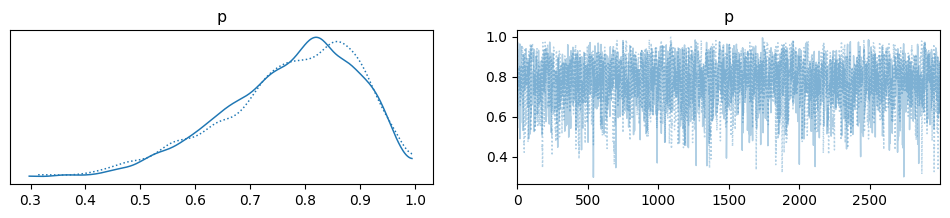

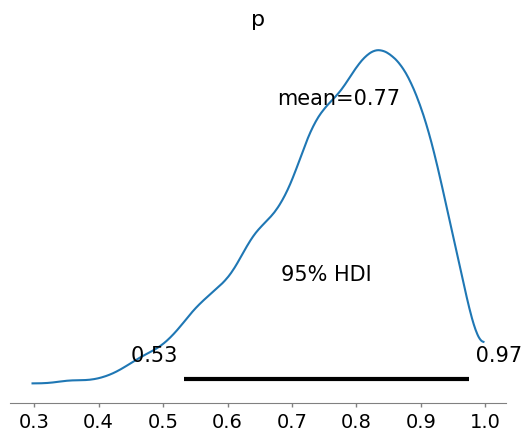

P(p > 0.6) ‚âà 0.8957


In [14]:
# X√¢y d·ª±ng m√¥ h√¨nh v·ªõi ti√™n nghi·ªám Beta(0.5, 0.5)
with pm.Model() as coin_model_c:
    # Prior: p ~ Beta(0.5, 0.5) th·ªÉ hi·ªán ni·ªÅm tin r·∫±ng ƒë·ªìng xu c√≥ kh·∫£ nƒÉng m·∫•t c√¢n ƒë·ªëi (U-shaped)
    p = pm.Beta("p", alpha=0.5, beta=0.5)

    # Likelihood: Tung ƒë·ªìng xu 10 l·∫ßn, quan s√°t 8 l·∫ßn ng·ª≠a
    y_obs = pm.Binomial("y_obs", n=10, p=p, observed=8)

    # L·∫•y m·∫´u posterior b·∫±ng MCMC (s·ª≠ d·ª•ng thu·∫≠t to√°n NUTS m·∫∑c ƒë·ªãnh)
    trace_c = pm.sample(draws=3000, tune=1000, chains=2, random_seed=42, target_accept=0.95)

# T√≥m t·∫Øt k·∫øt qu·∫£ posterior c·ªßa p
summary_c = az.summary(trace_c, var_names=["p"], hdi_prob=0.95)
print(summary_c)

# V·∫Ω trace plot cho ki·ªÉm tra h·ªôi t·ª•
az.plot_trace(trace_c, var_names=["p"])
plt.show()

# V·∫Ω ph√¢n ph·ªëi posterior c·ªßa p k√®m kho·∫£ng HDI 95%
az.plot_posterior(trace_c, var_names=["p"], hdi_prob=0.95)
plt.show()

# T√≠nh x√°c su·∫•t p > 0.6 t·ª´ c√°c m·∫´u
p_samples = trace_c.posterior["p"].values.flatten()
prob_gt_06 = np.mean(p_samples > 0.6)
print(f"P(p > 0.6) ‚âà {prob_gt_06:.4f}")

**K·∫øt lu·∫≠n :** $p ‚âà 0.772$ v√† x√°c su·∫•t $p > 0.6$ r·∫•t cao.

## 2d. $p$ ch·ªâ nh·∫≠n 1 trong 3 gi√° tr·ªã 0.2, 0.7, 0.9

Ta ch·ªçn ti√™n nghi·ªám ƒë·ªìng ƒë·ªÅu tr√™n 3 gi√° tr·ªã:
$$P(p = 0.2) = P(p = 0.7) = P(p = 0.9) = \frac{1}{3}$$

Output()

    mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.787  0.099       0.7        0.9      0.003      0.0    1492.0    1492.0   

   r_hat  
p    1.0  


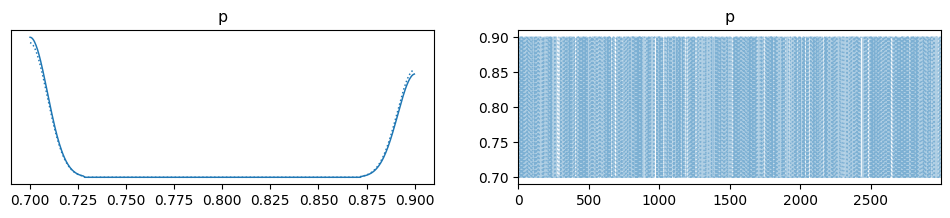

Posterior probabilities:
p = 0.2: 0.0000
p = 0.7: 0.5657
p = 0.9: 0.4343
Posterior mean of p ‚âà 0.7869
P(p > 0.6) ‚âà 1.0000


In [15]:
# Danh s√°ch c√°c gi√° tr·ªã m√† p c√≥ th·ªÉ nh·∫≠n
p_values = np.array([0.2, 0.7, 0.9])

with pm.Model() as model_d:
    # Bi·∫øn r·ªùi r·∫°c: index, c√≥ 3 gi√° tr·ªã v·ªõi ti√™n nghi·ªám ƒë·ªìng ƒë·ªÅu
    index = pm.Categorical("index", p= 1/3 * np.ones(3))

    # ƒê·ªãnh nghƒ©a p d·ª±a tr√™n index: n·∫øu index==0 th√¨ p=0.2, index==1 th√¨ p=0.7, index==2 th√¨ p=0.9
    p = pm.Deterministic(
    "p",
    pt.switch(
        pt.eq(index, 0),
        p_values[0],
        pt.switch(pt.eq(index, 1), p_values[1], p_values[2])
    )
)

    # Likelihood: Tung ƒë·ªìng xu 10 l·∫ßn, quan s√°t 8 l·∫ßn ng·ª≠a
    y_obs = pm.Binomial("y_obs", n=10, p=p, observed=8)

    # V√¨ c√≥ bi·∫øn r·ªùi r·∫°c, ta s·ª≠ d·ª•ng Metropolis sampler
    trace_d = pm.sample(draws=3000, tune=1000, chains=2, step=pm.Metropolis(), random_seed=42)

# T√≥m t·∫Øt k·∫øt qu·∫£
summary_d = az.summary(trace_d, var_names=["p"], hdi_prob=0.95)
print(summary_d)

# V·∫Ω trace plot c·ªßa p
az.plot_trace(trace_d, var_names=["p"])
plt.show()

# L·∫•y c√°c m·∫´u c·ªßa p (do p ch·ªâ nh·∫≠n 3 gi√° tr·ªã, ch√∫ng ta c√≥ th·ªÉ t√≠nh x√°c su·∫•t h·∫≠u nghi·ªám)
p_samples = trace_d.posterior["p"].values.flatten()

# ƒê·∫øm s·ªë m·∫´u t∆∞∆°ng ·ª©ng v·ªõi m·ªói gi√° tr·ªã
unique, counts = np.unique(p_samples, return_counts=True)
posterior_probs = dict(zip(unique, counts/len(p_samples)))
print("Posterior probabilities:")
for val in p_values:
    print(f"p = {val:.1f}: {posterior_probs.get(val, 0):.4f}")

# ∆Ø·ªõc l∆∞·ª£ng trung b√¨nh posterior c·ªßa p
posterior_mean = np.sum(np.array(list(posterior_probs.keys())) * np.array(list(posterior_probs.values())))
print(f"Posterior mean of p ‚âà {posterior_mean:.4f}")

# T√≠nh x√°c su·∫•t p > 0.6: ch·ªâ c√°c gi√° tr·ªã 0.7 v√† 0.9
prob_gt_06 = posterior_probs.get(0.7, 0) + posterior_probs.get(0.9, 0)
print(f"P(p > 0.6) ‚âà {prob_gt_06:.4f}")

**K·∫øt lu·∫≠n :** Theo m√¥ h√¨nh r·ªùi r·∫°c n√†y x√°c su·∫•t $p = 0.7 $ l√† $‚âà 0.5657$, x√°c su·∫•t $p = 0.9$ l√† $‚âà 0.4343$ g·∫ßn $0$ cho $p = 0.2$. V√† x√°c su·∫•t $p > 0.6$ x·∫•p x·ªâ 1.

## 2e. $p$ ch·ªâ nh·∫≠n gi√° tr·ªã trong kho·∫£ng [0.4,0.9]

Ta ch·ªçn ti√™n nghi·ªám l√† ph√¢n ph·ªëi ƒë·ªÅu t·ª´ $[0.4 , 0.9]$

Output()

    mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.772  0.123     0.532      0.975      0.003    0.002    2105.0    1997.0   

   r_hat  
p    1.0  


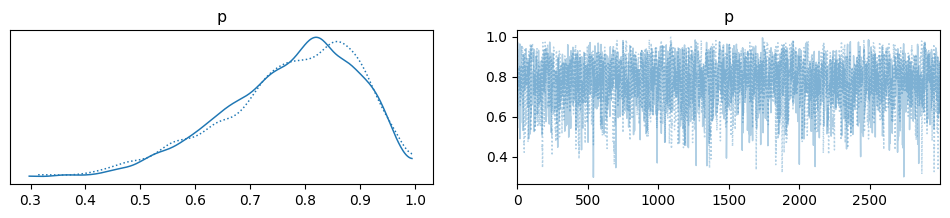

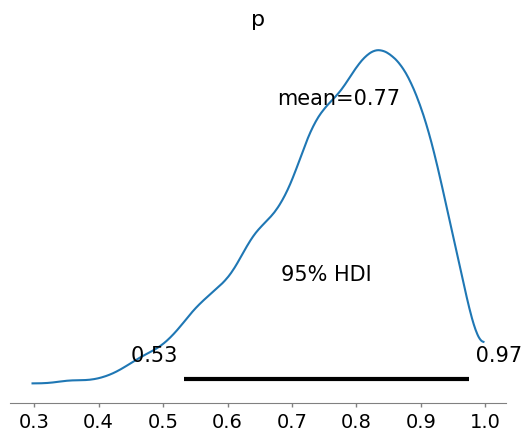

P(p > 0.6) ‚âà 0.8957


In [16]:

with pm.Model() as model_e:
    # Prior: p ~ Uniform(0.4, 0.9)
    p = pm.Uniform("p", lower=0.4, upper=0.9)

    # Likelihood: k ~ Binomial(n=n, p=p)
    obs = pm.Binomial("obs", n=10, p=p, observed=8)

    # L·∫•y m·∫´u posterior
    trace_e = pm.sample(draws=3000, tune=1000, chains=2, random_seed=42, target_accept=0.9)

# T√≥m t·∫Øt k·∫øt qu·∫£ posterior c·ªßa p
summary_e = az.summary(trace_e, var_names=["p"], hdi_prob=0.95)
print(summary_e)

# V·∫Ω trace plot cho ki·ªÉm tra h·ªôi t·ª•
az.plot_trace(trace_e, var_names=["p"])
plt.show()

# V·∫Ω ph√¢n ph·ªëi posterior c·ªßa p k√®m kho·∫£ng HDI 95%
az.plot_posterior(trace_e, var_names=["p"], hdi_prob=0.95)
plt.show()

# T√≠nh x√°c su·∫•t p > 0.6 t·ª´ c√°c m·∫´u
p_samples = trace_e.posterior["p"].values.flatten()
prob_gt_06 = np.mean(p_samples > 0.6)
print(f"P(p > 0.6) ‚âà {prob_gt_06:.4f}")


**K·∫øt lu·∫≠n:** Theo m√¥ h√¨nh tr√™n ph√¢n t√≠ch ƒë∆∞·ª£c th√¨ gi√° tr·ªã k√¨ v·ªçng c·ªßa $p ‚âà 0.77$ v√† x√°c su·∫•t $p > 0.6$ r·∫•t cao $‚âà 0.8957$

# C√¢u 3:

M·ª•c ti√™u:

Sau khi quan s√°t $Z = 4$, ta mu·ªën suy ra (inference) v·ªÅ $X$ v√† ƒë·∫∑c bi·ªát l√† x√°c su·∫•t $P(X \geq 3 | Z = 4)$.  
C·∫•u tr√∫c ph√¢n ph·ªëi chung:  
Bi·∫øn $X$ c√≥ ph√¢n ph·ªëi ti√™n nghi·ªám $f_X(x) = N(0, 2^2)$. Sau ƒë√≥ v·ªõi m·ªói gi√° tr·ªã $x$ th√¨ $Y \sim \text{Uniform}(0, |x|)$. V√† cu·ªëi c√πng $Z$ c√≥ ph√¢n ph·ªëi m≈© v·ªõi tham s·ªë $Œª = \frac{1}{y}$.  
Nh∆∞ v·∫≠y m√¥ h√¨nh x√°c su·∫•t chung c·ªßa $(X, Y, Z)$ l√†:
$$f_{X, Y, Z}(x, y, z) = f_{X}(x)f_{Y|X}(y|x)f_{Z|Y}(z|y)$$
Sau khi quan s√°t th·∫•y $Z = 4$ theo ƒë·ªãnh l√≠ Bayes ph√¢n ph·ªëi h·∫≠u nghi·ªám c·ªßa $(X, Y)$ s·∫Ω t·ªâ l·ªá v·ªõi:
$$f_{X,Y|Z}(x, y|z = 4) ‚àù f_{Z|Y}(4|y)f_X{x}f_{Y|X}(y | x)$$

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


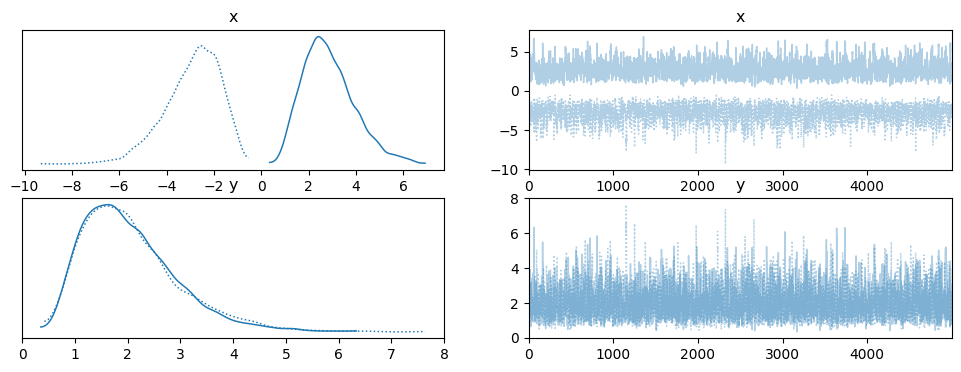

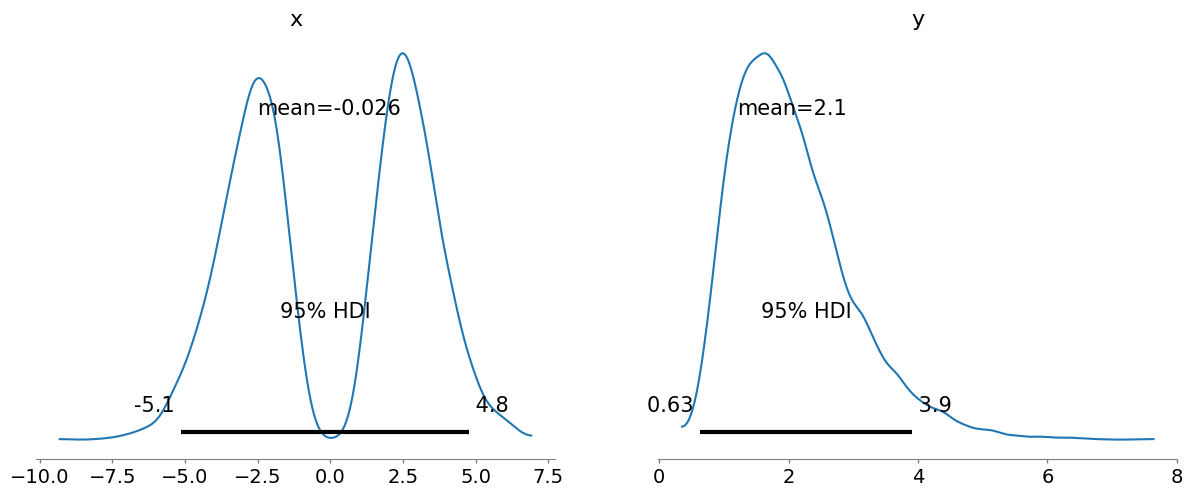

Estimated P(X >= 3 | Z = 4) = 0.1983
95% Credible Interval = [0.1906, 0.2062]


In [17]:
with pm.Model() as model3:
    # X ~ N(0, 4) v·ªõi sigma=2
    x = pm.Normal("x", mu=0, sigma=2)
    # Y | X ~ Uniform(0, |x|)
    y = pm.Uniform("y", lower=0, upper=pt.abs(x))
    # Z | Y ~ Exponential(rate = 1/y) v·ªõi d·ªØ li·ªáu quan s√°t Z=4
    z = pm.Exponential("z", lam=1.0/y, observed=4)

    trace3 = pm.sample(draws=5000, tune=2000, chains=2, target_accept=0.99, random_seed=42)

az.plot_trace(trace3, var_names=["x", "y"])
plt.show()

az.plot_posterior(trace3, var_names=["x", "y"], hdi_prob=0.95)
plt.show()

x_samples = trace3.posterior["x"].values.flatten()
indicator = (x_samples >= 3).astype(int)
# S·ªë m·∫´u hi·ªáu qu·∫£
N_samples = len(indicator)
# S·ªë m·∫´u tho·∫£ m√£n ƒëi·ªÅu ki·ªán
k = np.sum(indicator)

# ∆Ø·ªõc l∆∞·ª£ng P(X>=3|Z=4)
p_est = k / N_samples

# T√≠nh kho·∫£ng tin c·∫≠y 95% d·ª±a tr√™n ph√¢n ph·ªëi Beta (v·ªõi prior Beta(1,1))
ci_lower = beta.ppf(0.025, k + 1, N_samples - k + 1)
ci_upper = beta.ppf(0.975, k + 1, N_samples - k + 1)

print(f"Estimated P(X >= 3 | Z = 4) = {p_est:.4f}")
print(f"95% Credible Interval = [{ci_lower:.4f}, {ci_upper:.4f}]")

# C√¢u 4

## Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu

In [18]:
# ƒê·ªãnh nghƒ©a t√™n c·ªôt d·ª±a tr√™n m√¥ t·∫£ c·ªßa Auto MPG dataset
column_names = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "model_year",
    "origin",
    "car_name",
]

df = pd.read_csv("auto-mpg.data", sep="\s+", names=column_names, na_values="?")

# X·ª≠ l√Ω c·ªôt car_name: lo·∫°i b·ªè d·∫•u ngo·∫∑c k√©p n·∫øu c·∫ßn
df["car_name"] = df["car_name"].str.replace('"', "")

# Chuy·ªÉn ƒë·ªïi c·ªôt 'horsepower' sang ki·ªÉu s·ªë (float)
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

# Chuy·ªÉn ƒë·ªïi bi·∫øn 'origin': t·ª´ s·ªë sang t√™n v√πng
origin_map = {1: "American", 2: "European", 3: "Japanese"}
df["origin"] = df["origin"].map(origin_map)

df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.1+ KB


(    mpg  cylinders  displacement  horsepower  weight  acceleration  \
 0  18.0          8         307.0       130.0  3504.0          12.0   
 1  15.0          8         350.0       165.0  3693.0          11.5   
 2  18.0          8         318.0       150.0  3436.0          11.0   
 3  16.0          8         304.0       150.0  3433.0          12.0   
 4  17.0          8         302.0       140.0  3449.0          10.5   
 
    model_year    origin                   car_name  
 0          70  American  chevrolet chevelle malibu  
 1          70  American          buick skylark 320  
 2          70  American         plymouth satellite  
 3          70  American              amc rebel sst  
 4          70  American                ford torino  ,
 None)

In [19]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

Ta s·∫Ω ƒëi·ªÅn nh·ªØng d√≤ng c·ªßa c·ªôt horsepower b·ªã null = mean

In [20]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

Tr∆∞·ªõc h·∫øt, t√°ch d·ªØ li·ªáu theo gi√° tr·ªã c·ªßa c·ªôt origin ƒë·ªÉ ti·ªán cho vi·ªác x√¢y d·ª±ng m√¥ h√¨nh ri√™ng cho t·ª´ng nh√≥m.

In [21]:
df_american = df[df['origin'] == 'American']
df_european = df[df['origin'] == 'European']
df_japanese = df[df['origin'] == 'Japanese']
# Ki·ªÉm tra s·ªë l∆∞·ª£ng m·∫´u trong m·ªói nh√≥m:
print("American:", df_american.shape[0])
print("European:", df_european.shape[0])
print("Japanese:", df_japanese.shape[0])

American: 249
European: 70
Japanese: 79


## 4.1 M√¥ h√¨nh ph√¢n ph·ªëi chu·∫©n ri√™ng l·∫ª theo t·ª´ng nh√≥m

### 1. Gi·∫£ ƒë·ªãnh Ph√¢n Ph·ªëi

Gi·∫£ s·ª≠ r·∫±ng ƒë·ªëi v·ªõi m·ªói nh√≥m $ g $ (v√≠ d·ª•: American, European, Japanese), MPG c·ªßa xe c√≥ th·ªÉ ƒë∆∞·ª£c m√¥ h√¨nh h√≥a b·∫±ng ph√¢n ph·ªëi Normal:

$$
\text{mpg}_i \sim \mathcal{N}(\mu_g, \sigma_g^2), \quad i \in g.
$$

Trong ƒë√≥:
- $\mu_g$ l√† trung b√¨nh MPG c·ªßa nh√≥m $g$.
- $\sigma_g$ l√† ƒë·ªô l·ªách chu·∫©n c·ªßa MPG trong nh√≥m $g$.

### 2. Likelihood c·ªßa D·ªØ li·ªáu

V·ªõi t·∫≠p d·ªØ li·ªáu $\{mpg_i\}_{i\in g}$ c·ªßa nh√≥m $g$, h√†m likelihood ƒë∆∞·ª£c x√¢y d·ª±ng nh∆∞ sau:

$$
L_g(\mu_g, \sigma_g \mid \{mpg_i\}_{i \in g}) = \prod_{i \in g} \frac{1}{\sqrt{2\pi}\,\sigma_g}\,\exp\!\Bigl[-\frac{1}{2}\Bigl(\frac{mpg_i-\mu_g}{\sigma_g}\Bigr)^2\Bigr].
$$

N·∫øu c√≥ nhi·ªÅu quan s√°t, likelihood chung c·ªßa nh√≥m l√† t√≠ch c·ªßa c√°c h√†m m·∫≠t ƒë·ªô cho t·ª´ng quan s√°t.

### 3. Prior Cho C√°c Tham S·ªë

Ch·ªçn c√°c ti√™n nghi·ªám "r·ªông" (weakly informative priors) ƒë·ªÉ d·ªØ li·ªáu c√≥ th·ªÉ ch·ªß y·∫øu ‚Äúk√©o‚Äù k·∫øt qu·∫£:
- **Cho trung b√¨nh $\mu_g$:**
  
  $$
  \mu_g \sim \mathcal{N}(0, 100^2).
  $$
  
- **Cho ƒë·ªô l·ªách chu·∫©n $\sigma_g$:**

  $$
  \sigma_g \sim \text{HalfNormal}(\sigma=10).
  $$

### 4. M·ª•c Ti√™u

M·ª•c ti√™u c·ªßa m√¥ h√¨nh l√†:
- ∆Ø·ªõc l∆∞·ª£ng c√°c tham s·ªë $\mu_g$ v√† $\sigma_g$ cho m·ªói nh√≥m ri√™ng r·∫Ω.
- So s√°nh MPG trung b√¨nh gi·ªØa c√°c nh√≥m (v√≠ d·ª•: so s√°nh $\mu_{\text{American}}$, $\mu_{\text{European}}$ v√† $\mu_{\text{Japanese}}$) ƒë·ªÉ x√°c ƒë·ªãnh xem c√≥ s·ª± kh√°c bi·ªát ƒë√°ng k·ªÉ hay kh√¥ng.

Output()

               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu_american  20.083  0.408  19.306   20.850      0.004    0.005    8889.0   
mu_european  27.880  0.835  26.299   29.449      0.009    0.011    8564.0   
mu_japanese  30.447  0.700  29.129   31.738      0.008    0.009    7170.0   

             ess_tail  r_hat  
mu_american    4656.0    1.0  
mu_european    5059.0    1.0  
mu_japanese    4779.0    1.0  


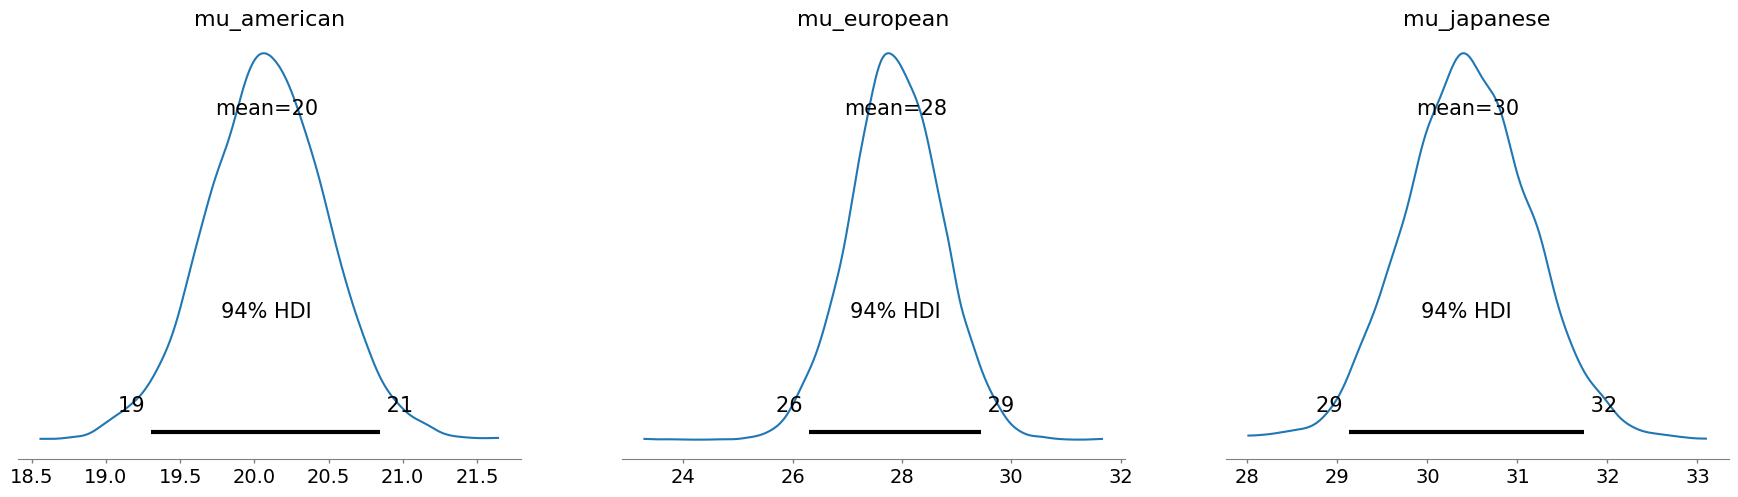

In [22]:
with pm.Model() as model_normal:
    # Priors cho nh√≥m American:
    mu_american = pm.Normal("mu_american", mu=0, sigma=100)
    sigma_american = pm.HalfNormal("sigma_american", sigma=10)

    # Priors cho nh√≥m European:
    mu_european = pm.Normal("mu_european", mu=0, sigma=100)
    sigma_european = pm.HalfNormal("sigma_european", sigma=10)

    # Priors cho nh√≥m Japanese:
    mu_japanese = pm.Normal("mu_japanese", mu=0, sigma=100)
    sigma_japanese = pm.HalfNormal("sigma_japanese", sigma=10)

    # Likelihood cho t·ª´ng nh√≥m:
    like_american = pm.Normal("like_american", mu=mu_american, sigma=sigma_american,
                              observed=df_american['mpg'].values)
    like_european = pm.Normal("like_european", mu=mu_european, sigma=sigma_european,
                              observed=df_european['mpg'].values)
    like_japanese = pm.Normal("like_japanese", mu=mu_japanese, sigma=sigma_japanese,
                              observed=df_japanese['mpg'].values)

    # L·∫•y m·∫´u t·ª´ posterior:
    trace_normal = pm.sample(draws=3000, tune=1000, chains=2, random_seed=42)

# T√≥m t·∫Øt k·∫øt qu·∫£:
print(az.summary(trace_normal, var_names=["mu_american", "mu_european", "mu_japanese"]))
az.plot_posterior(trace_normal, var_names=["mu_american", "mu_european", "mu_japanese"])
plt.show()


## 4.2 M√¥ h√¨nh ph√¢n ph·ªëi student ri√™ng l·∫ª cho t·ª´ng nh√≥m

### 1. Gi·∫£ ƒë·ªãnh Ph√¢n Ph·ªëi

Trong m√¥ h√¨nh n√†y, ch√∫ng ta gi·∫£ ƒë·ªãnh r·∫±ng v·ªõi m·ªói nh√≥m $g$ (v√≠ d·ª•: American, European, Japanese), d·ªØ li·ªáu MPG c·ªßa m·ªói xe $x_i$ ƒë∆∞·ª£c m√¥ h√¨nh h√≥a b·ªüi ph√¢n ph·ªëi Student‚Äôs t v·ªõi c√°c tham s·ªë:
- $\mu_g$: Trung b√¨nh MPG c·ªßa nh√≥m $g$
- $\sigma_g$: ƒê·ªô l·ªách chu·∫©n c·ªßa MPG trong nh√≥m $g$
- $\nu$: B·∫≠c t·ª± do, ƒëi·ªÅu ch·ªânh ƒë·ªô d√†y c·ªßa ƒëu√¥i ph√¢n ph·ªëi (gi√° tr·ªã nh·ªè h∆°n cho ƒëu√¥i d√†y h∆°n)

C√¥ng th·ª©c h√†m m·∫≠t ƒë·ªô c·ªßa ph√¢n ph·ªëi Student‚Äôs t l√†:

$$
f(x_i \mid \mu_g, \sigma_g, \nu) = \frac{\Gamma\Bigl(\frac{\nu+1}{2}\Bigr)}{\Gamma\Bigl(\frac{\nu}{2}\Bigr)\sqrt{\nu\pi}\,\sigma_g} \left[1 + \frac{1}{\nu}\Bigl(\frac{x_i - \mu_g}{\sigma_g}\Bigr)^2 \right]^{-\frac{\nu+1}{2}}.
$$

### 2. Likelihood cho M·ªôt Nh√≥m

Gi·∫£ s·ª≠ r·∫±ng ƒë·ªëi v·ªõi nh√≥m $g$ (v√≠ d·ª•: nh√≥m American), t·∫≠p d·ªØ li·ªáu quan s√°t ƒë∆∞·ª£c l√† $\{x_1, x_2, \dots, x_{n_g}\}$. Khi ƒë√≥, h√†m likelihood cho nh√≥m n√†y ƒë∆∞·ª£c x√¢y d·ª±ng nh∆∞ sau:

$$
L(\mu_g, \sigma_g, \nu \mid \{x_i\}_{i \in g}) = \prod_{i=1}^{n_g} f(x_i \mid \mu_g, \sigma_g, \nu),
$$

v·ªõi $f(x_i \mid \mu_g, \sigma_g, \nu)$ l√† h√†m m·∫≠t ƒë·ªô c·ªßa ph√¢n ph·ªëi Student‚Äôs t nh∆∞ ƒë√£ n√™u ·ªü tr√™n.

### 3. Prior Cho C√°c Tham S·ªë

Ch√∫ng ta ch·ªçn c√°c ti√™n nghi·ªám "r·ªông" (weakly informative priors) cho c√°c tham s·ªë:
- **Cho trung b√¨nh $\mu_g$:**

  $$
  \mu_g \sim \mathcal{N}(0, 100^2)
  $$
  
  ƒê√¢y l√† m·ªôt l·ª±a ch·ªçn ph·ªï bi·∫øn khi kh√¥ng c√≥ nhi·ªÅu th√¥ng tin tr∆∞·ªõc v·ªÅ gi√° tr·ªã trung b√¨nh.

- **Cho ƒë·ªô l·ªách chu·∫©n $\sigma_g$:**

  $$
  \sigma_g \sim \text{HalfNormal}(\sigma=10)
  $$
  
  V√¨ $\sigma_g > 0$, n√™n s·ª≠ d·ª•ng ph√¢n ph·ªëi b√°n chu·∫©n.

- **Cho b·∫≠c t·ª± do $\nu$:**
  $$
  \nu  = 3
  $$

### 4. M·ª•c Ti√™u c·ªßa M√¥ H√¨nh

- ∆Ø·ªõc l∆∞·ª£ng c√°c tham s·ªë $\mu_g$ v√† $\sigma_g$ cho m·ªói nh√≥m.
- So s√°nh c√°c MPG trung b√¨nh gi·ªØa c√°c nh√≥m (v√≠ d·ª•, so s√°nh $\mu_{\text{American}}$, $\mu_{\text{European}}$ v√† $\mu_{\text{Japanese}}$).
- S·ª≠ d·ª•ng m√¥ h√¨nh Student T gi√∫p kh√°ng l·∫°i ngo·∫°i lai nh·ªù v√†o ƒë·∫∑c t√≠nh ƒëu√¥i d√†y c·ªßa ph√¢n ph·ªëi.



Output()

               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu_american  18.978  0.398  18.221   19.725      0.004    0.005    8566.0   
mu_european  27.046  0.746  25.619   28.429      0.008    0.010    8306.0   
mu_japanese  30.734  0.721  29.340   32.079      0.009    0.009    7040.0   

             ess_tail  r_hat  
mu_american    5178.0    1.0  
mu_european    5174.0    1.0  
mu_japanese    4416.0    1.0  


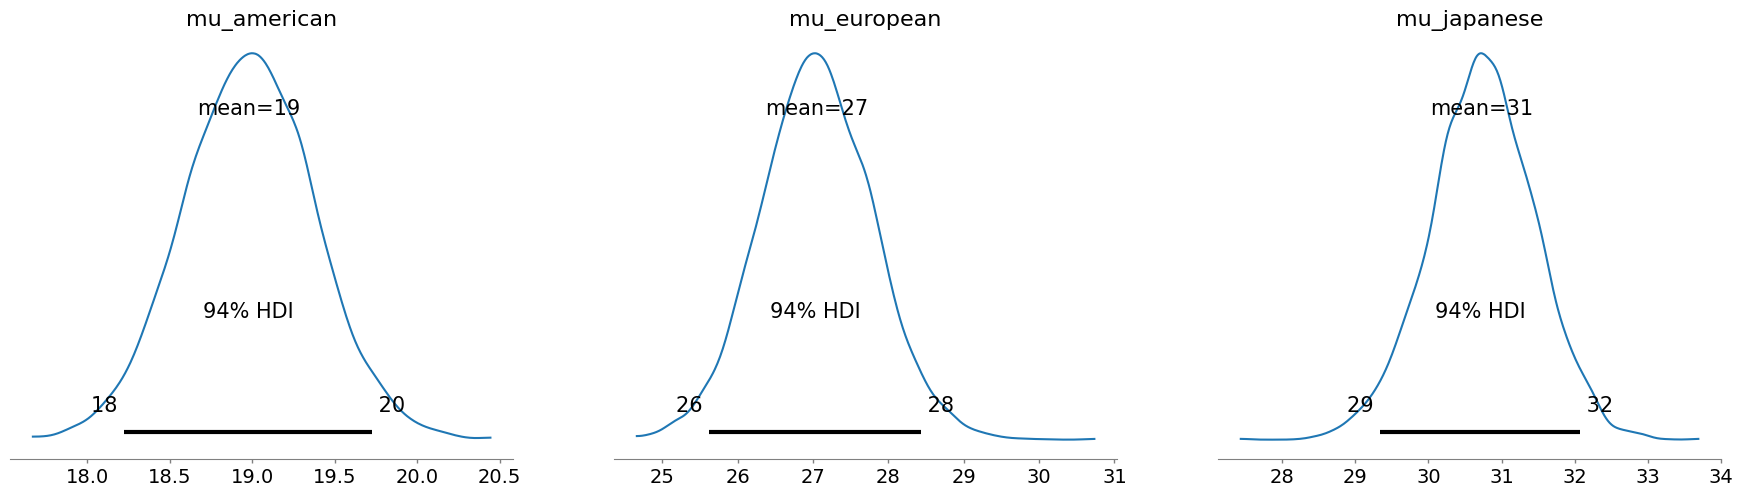

In [23]:
with pm.Model() as model_student:
    nu = 3
    mu_american = pm.Normal("mu_american", mu=0, sigma=100)
    sigma_american = pm.HalfNormal("sigma_american", sigma=10)

    mu_european = pm.Normal("mu_european", mu=0, sigma=100)
    sigma_european = pm.HalfNormal("sigma_european", sigma=10)

    mu_japanese = pm.Normal("mu_japanese", mu=0, sigma=100)
    sigma_japanese = pm.HalfNormal("sigma_japanese", sigma=10)

    like_american = pm.StudentT("like_american", nu=nu, mu=mu_american, sigma=sigma_american,
                                observed=df_american['mpg'].values)
    like_european = pm.StudentT("like_european", nu=nu, mu=mu_european, sigma=sigma_european,
                                observed=df_european['mpg'].values)
    like_japanese = pm.StudentT("like_japanese", nu=nu, mu=mu_japanese, sigma=sigma_japanese,
                                observed=df_japanese['mpg'].values)

    trace_student = pm.sample(draws=3000, tune=1000, chains=2, random_seed=42)

print(az.summary(trace_student, var_names=["mu_american", "mu_european", "mu_japanese"]))
az.plot_posterior(trace_student, var_names=["mu_american", "mu_european", "mu_japanese"])
plt.show()


## 4.3 M√¥ h√¨nh ph√¢n c·∫•p (‚Äúchia s·∫ª th√¥ng tin nh√≥m‚Äù) v·ªõi ph√¢n ph·ªëi Student

### 1. Gi·∫£ ƒë·ªãnh Ph√¢n ph·ªëi v√† C·∫•u tr√∫c M√¥ h√¨nh

Trong m√¥ h√¨nh ph√¢n c·∫•p, ch√∫ng ta gi·∫£ ƒë·ªãnh r·∫±ng c√°c xe thu·ªôc c√°c nh√≥m (American, European, Japanese) c√≥ MPG ƒë∆∞·ª£c m√¥ h√¨nh h√≥a b·ªüi ph√¢n ph·ªëi StudentT, nh∆∞ng c√°c trung b√¨nh c·ªßa t·ª´ng nh√≥m $\mu_g$ ƒë∆∞·ª£c ‚Äúchia s·∫ª th√¥ng tin‚Äù qua m·ªôt ph√¢n ph·ªëi chung.

#### 1.1. Ph√¢n ph·ªëi c·ªßa MPG theo nh√≥m

V·ªõi m·ªói nh√≥m $g$ (trong ƒë√≥ $g \in \{\text{American}, \text{European}, \text{Japanese}\}$), ta gi·∫£ ƒë·ªãnh r·∫±ng:

$$
\text{mpg}_i \sim t_{\nu}(\mu_g, \sigma_g), \quad i \in g,
$$

v·ªõi c√°c tham s·ªë:
- $\mu_g$: trung b√¨nh MPG c·ªßa nh√≥m $g$,
- $\sigma_g$: ƒë·ªô l·ªách chu·∫©n c·ªßa MPG trong nh√≥m $g$,
- $\nu$: b·∫≠c t·ª± do (degree of freedom) chung cho c√°c nh√≥m, ki·ªÉm so√°t ƒë·ªô d√†y c·ªßa ƒëu√¥i ph√¢n ph·ªëi.

#### 1.2. C·∫•u tr√∫c ph√¢n c·∫•p cho trung b√¨nh $\mu_g$

C√°c trung b√¨nh c·ªßa t·ª´ng nh√≥m ƒë∆∞·ª£c cho l√† ƒë∆∞·ª£c r√∫t ra t·ª´ m·ªôt ph√¢n ph·ªëi chung:

$$
\mu_g \sim \mathcal{N}(\mu_0, \tau^2),
$$

v·ªõi:
- $\mu_0$: trung b√¨nh chung (hyperparameter),
- $\tau$: ƒë·ªô l·ªách chu·∫©n c·ªßa ph√¢n ph·ªëi chung, ƒëo l∆∞·ªùng m·ª©c ƒë·ªô kh√°c bi·ªát gi·ªØa c√°c nh√≥m.

#### 1.3. Prior cho c√°c tham s·ªë

Ch√∫ng ta ch·ªçn c√°c ti√™n nghi·ªám "r·ªông" (weakly informative) nh∆∞ sau:

- **Hyperpriors:**
  - $\mu_0 \sim \mathcal{N}(0, 100^2)$
  - $\tau \sim \text{HalfNormal}(\sigma=10)$
- **Prior cho b·∫≠c t·ª± do:**
  - $\nu \sim \text{Exponential}(1/10)$ (ƒë·∫£m b·∫£o $\nu>0$)
- **Prior cho t·ª´ng nh√≥m:**
  - $\mu_g \sim \mathcal{N}(\mu_0, \tau^2)$
  - $\sigma_g \sim \text{HalfNormal}(\sigma=10)$

### 2. Likelihood c·ªßa d·ªØ li·ªáu

V·ªõi m·ªói nh√≥m \(g\), likelihood cho c√°c quan s√°t $\{mpg_i\}_{i \in g}$ ƒë∆∞·ª£c m√¥ t·∫£ b·ªüi h√†m m·∫≠t ƒë·ªô c·ªßa ph√¢n ph·ªëi StudentT:

$$
f(\text{mpg}_i \mid \mu_g, \sigma_g, \nu) = \frac{\Gamma\Bigl(\frac{\nu+1}{2}\Bigr)}{\Gamma\Bigl(\frac{\nu}{2}\Bigr)\sqrt{\nu\pi}\,\sigma_g} \left[1 + \frac{1}{\nu}\left(\frac{\text{mpg}_i-\mu_g}{\sigma_g}\right)^2\right]^{-\frac{\nu+1}{2}}.
$$

Gi·∫£ s·ª≠ c√°c nh√≥m c√≥ d·ªØ li·ªáu ƒë·ªôc l·∫≠p, likelihood chung c·ªßa m√¥ h√¨nh l√† t√≠ch c·ªßa c√°c likelihood ri√™ng theo t·ª´ng nh√≥m.

### 3. M·ª•c ti√™u c·ªßa m√¥ h√¨nh

- **∆Ø·ªõc l∆∞·ª£ng:**  
  ∆∞·ªõc l∆∞·ª£ng c√°c tham s·ªë $\mu_0$, $\tau$, v√† c√°c $\mu_g$ cho t·ª´ng nh√≥m c√πng v·ªõi ƒë·ªô l·ªách chu·∫©n $\sigma_g$ v√† b·∫≠c t·ª± do $\nu$.

- **So s√°nh:**  
  so s√°nh MPG trung b√¨nh gi·ªØa c√°c nh√≥m (American, European, Japanese) th√¥ng qua c√°c tham s·ªë $\mu_g$.

- **∆Øu ƒëi·ªÉm c·ªßa m√¥ h√¨nh ph√¢n c·∫•p:**  
  Khi m·ªôt s·ªë nh√≥m c√≥ s·ªë l∆∞·ª£ng m·∫´u √≠t, m√¥ h√¨nh ph√¢n c·∫•p gi√∫p ‚Äúchia s·∫ª th√¥ng tin‚Äù qua hyperpriors, t·ª´ ƒë√≥ cho k·∫øt qu·∫£ ·ªïn ƒë·ªãnh v√† ch√≠nh x√°c h∆°n.

Output()

ERROR:pymc.stats.convergence:There were 10 divergences after tuning. Increase `target_accept` or reparameterize.


               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu0          26.020  5.031  16.877   36.140      0.077    0.125    4858.0   
mu_american  19.841  0.429  19.042   20.672      0.005    0.006    7655.0   
mu_european  27.618  0.815  26.151   29.178      0.009    0.011    9059.0   
mu_japanese  30.401  0.696  29.083   31.666      0.008    0.010    7184.0   

             ess_tail  r_hat  
mu0            2846.0    1.0  
mu_american    4494.0    1.0  
mu_european    4439.0    1.0  
mu_japanese    4112.0    1.0  


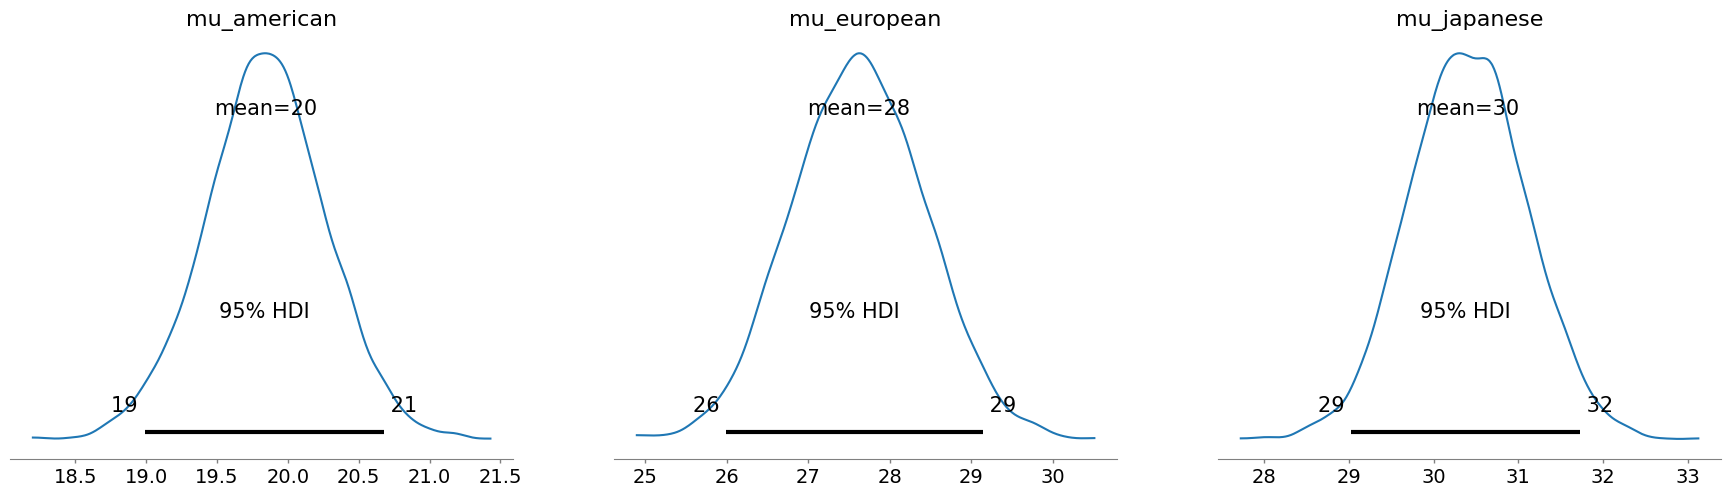

In [24]:
with pm.Model() as model_hierarchical:
    # Hyperpriors chung:
    mu0 = pm.Normal("mu0", mu=0, sigma=100)
    tau = pm.HalfNormal("tau", sigma=10)

    # Hyperprior cho nu (b·∫≠c t·ª± do) ‚Äì c√≥ th·ªÉ chung cho t·∫•t c·∫£
    nu = pm.Exponential("nu", 1/10)

    # Priors cho t·ª´ng nh√≥m v·ªõi Œº ƒë∆∞·ª£c chia s·∫ª th√¥ng tin:
    mu_american = pm.Normal("mu_american", mu=mu0, sigma=tau)
    sigma_american = pm.HalfNormal("sigma_american", sigma=10)

    mu_european = pm.Normal("mu_european", mu=mu0, sigma=tau)
    sigma_european = pm.HalfNormal("sigma_european", sigma=10)

    mu_japanese = pm.Normal("mu_japanese", mu=mu0, sigma=tau)
    sigma_japanese = pm.HalfNormal("sigma_japanese", sigma=10)

    # Likelihood s·ª≠ d·ª•ng StudentT cho t·ª´ng nh√≥m:
    like_american = pm.StudentT("like_american", nu=nu, mu=mu_american, sigma=sigma_american,
                                observed=df_american['mpg'].values)
    like_european = pm.StudentT("like_european", nu=nu, mu=mu_european, sigma=sigma_european,
                                observed=df_european['mpg'].values)
    like_japanese = pm.StudentT("like_japanese", nu=nu, mu=mu_japanese, sigma=sigma_japanese,
                                observed=df_japanese['mpg'].values)

    trace_hierarchical = pm.sample(draws=3000, tune=1000, chains=2, random_seed=42)

print(az.summary(trace_hierarchical, var_names=["mu0", "mu_american", "mu_european", "mu_japanese"]))
az.plot_posterior(trace_hierarchical, var_names=["mu_american", "mu_european", "mu_japanese"], hdi_prob=0.95)
plt.show()


## **T·ªïng k·∫øt**:
### 1.M√¥ h√¨nh ph√¢n ph·ªëi chu·∫©n ri√™ng l·∫ª theo t·ª´ng nh√≥m
- American:
  - ∆Ø·ªõc l∆∞·ª£ng trung b√¨nh MPG: kho·∫£ng 20
  - Kho·∫£ng HDI 94%: kho·∫£ng $[19.306,20.850]$
- European:
  - ∆Ø·ªõc l∆∞·ª£ng trung b√¨nh MPG: kho·∫£ng 28
  - Kho·∫£ng HDI 94%: kho·∫£ng $[26.299,29.449]$
- Japanese:
  - ∆Ø·ªõc l∆∞·ª£ng trung b√¨nh MPG: kho·∫£ng 30
  - Kho·∫£ng HDI 94%: kho·∫£ng $[29.129,31.738]$

### 2.StudentT Ri√™ng R·∫Ω
- American:
  - ∆Ø·ªõc l∆∞·ª£ng trung b√¨nh MPG: kho·∫£ng 19
  - Kho·∫£ng HDI 94%: kho·∫£ng $[18.221   ,19.725]$
- European:
  - ∆Ø·ªõc l∆∞·ª£ng trung b√¨nh MPG: kho·∫£ng 27
  - Kho·∫£ng HDI 94%: kho·∫£ng $[25.619   ,28.429]$
- Japanese:
  - ∆Ø·ªõc l∆∞·ª£ng trung b√¨nh MPG: kho·∫£ng 31
  - Kho·∫£ng HDI 94%: kho·∫£ng $[29.340   ,32.079]$

### 3.Ph√¢n c·∫•p v·ªõi StudentT (Hierarchical Model)
- American:
  - ∆Ø·ªõc l∆∞·ª£ng trung b√¨nh MPG: kho·∫£ng 20
  - Kho·∫£ng HDI 95%: kho·∫£ng $[19.042   ,20.672]$
- European:
  - ∆Ø·ªõc l∆∞·ª£ng trung b√¨nh MPG: kho·∫£ng 28
  - Kho·∫£ng HDI 95%: kho·∫£ng $[26.151   ,29.178]$
- Japanese:
  - ∆Ø·ªõc l∆∞·ª£ng trung b√¨nh MPG: kho·∫£ng 30
  - Kho·∫£ng HDI 95%: kho·∫£ng $[29.083   ,31.666]$

## **Nh·∫≠n x√©t chung :**
- Th·ª© t·ª± MPG trung b√¨nh gi·ªØa c√°c nh√≥m ƒë∆∞·ª£c ∆∞·ªõc l∆∞·ª£ng ·ªü c·∫£ 3 m√¥ h√¨nh ƒë·ªÅu nh·∫•t qu√°n, ƒë√≥ l√†:
American < European < Japanese.
- M√¥ h√¨nh Normal (Model 1) cho k·∫øt qu·∫£ ·ªïn ƒë·ªãnh ƒë·ªëi v·ªõi nh√≥m c√≥ s·ªë l∆∞·ª£ng m·∫´u l·ªõn (American), nh∆∞ng c√≥ th·ªÉ b·ªã ·∫£nh h∆∞·ªüng b·ªüi ngo·∫°i lai ƒë·ªëi v·ªõi c√°c nh√≥m kh√°c.
- M√¥ h√¨nh StudentT Ri√™ng R·∫Ω (Model 2) gi√∫p kh√°ng ngo·∫°i lai t·ªët h∆°n (ƒë·∫∑c bi·ªát n·∫øu c√≥ nh·ªØng gi√° tr·ªã MPG b·∫•t th∆∞·ªùng), nh∆∞ng v√¨ kh√¥ng ‚Äúchia s·∫ª th√¥ng tin‚Äù gi·ªØa c√°c nh√≥m, nh√≥m c√≥ d·ªØ li·ªáu √≠t (European, Japanese) c√≥ th·ªÉ cho kho·∫£ng tin c·∫≠y r·ªông h∆°n.
- M√¥ h√¨nh Ph√¢n c·∫•p v·ªõi StudentT (Model 3) k·∫øt h·ª£p ∆∞u ƒëi·ªÉm c·ªßa m√¥ h√¨nh StudentT (kh√°ng ngo·∫°i lai) v√† m√¥ h√¨nh ph√¢n c·∫•p (chia s·∫ª th√¥ng tin gi·ªØa c√°c nh√≥m). ƒêi·ªÅu n√†y cho ph√©p c√°c nh√≥m c√≥ s·ªë l∆∞·ª£ng m·∫´u nh·ªè (nh∆∞ European v√† Japanese) ƒë∆∞·ª£c ‚Äúk√©o‚Äù v·ªÅ gi√° tr·ªã chung v√† c√≥ kho·∫£ng tin c·∫≠y ·ªïn ƒë·ªãnh h∆°n.  


## **K·∫øt lu·∫≠n :**
M√¥ h√¨nh Ph√¢n c·∫•p v·ªõi StudentT (Model 3) ƒë∆∞·ª£c ƒë√°nh gi√° l√† l·ª±a ch·ªçn t·ªët nh·∫•t cho b√†i to√°n n√†y v√¨:
- N√≥ cho ph√©p chia s·∫ª th√¥ng tin gi·ªØa c√°c nh√≥m, gi√∫p ∆∞·ªõc l∆∞·ª£ng tr·ªü n√™n ·ªïn ƒë·ªãnh h∆°n ƒë·ªëi v·ªõi c√°c nh√≥m c√≥ s·ªë m·∫´u nh·ªè.
- S·ª≠ d·ª•ng StudentT gi√∫p kh√°ng ngo·∫°i lai, ƒë·∫£m b·∫£o k·∫øt qu·∫£ kh√¥ng b·ªã ·∫£nh h∆∞·ªüng qu√° m·ª©c b·ªüi c√°c gi√° tr·ªã b·∫•t th∆∞·ªùng.
- K·∫øt qu·∫£ c·ªßa m√¥ h√¨nh ph√¢n c·∫•p (Model 3) cho c√°c gi√° tr·ªã trung b√¨nh MPG:
  - American $‚âà 20$ Kho·∫£ng HDI 95%: kho·∫£ng $[19.042   ,20.672]$
  - European $‚âà 28$ Kho·∫£ng HDI 95%: kho·∫£ng $[26.151   ,29.178]$
  - Japanese $‚âà 30$ Kho·∫£ng HDI 95%: kho·∫£ng $[29.083   ,31.666]$